# Dataset link
## https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

In [19]:
#import libraries
from keras.models import Sequential 
from keras.layers import Convolution2D 
from keras.layers import MaxPooling2D 
from keras.layers import Flatten
from keras.layers import Activation, Dense ,Dropout
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator,load_img
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [20]:
warnings.filterwarnings("ignore")

In [21]:
#Initializing CNN
model = Sequential()

#Step 1 - Convolution
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(64,64,3), padding='same'))

#step 2 - MaxPooling
model.add(MaxPooling2D(pool_size=(2, 2)))

#Adding another layer to improve the accuracy
model.add(Convolution2D(32, (3, 3),  activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Adding another layer to improve the accuracy
model.add(Convolution2D(32, (3, 3),  activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Adding another layer to improve the accuracy
model.add(Convolution2D(64, (3, 3),  activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Adding another layer to improve the accuracy
model.add(Convolution2D(64, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Add an second Convolution layer 
model.add(Convolution2D(64, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

#step 3 - Flattening
model.add(Flatten())

#step 4 - Full Connection
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 64)         

In [23]:
#compile the CNN
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Data Augmentation

In [24]:
#Fitting the CNN to the image
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
trainig_set = train_datagen.flow_from_directory(
        r'D:\chest_xray\chest_xray\train',
        target_size=(64, 64),
        batch_size=64,
        class_mode='binary')
test_set = test_datagen.flow_from_directory(
        r'D:\chest_xray\chest_xray\test',
        target_size=(64, 64),
        batch_size=64,
        class_mode='binary')
model.fit(
        trainig_set,
        steps_per_epoch=82,
        epochs=200,
        validation_data=test_set,
        validation_steps=82)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/200
82/82 [==============================] - 101s 1s/step - loss: 0.5960 - accuracy: 0.7324 - val_loss: 0.7574 - val_accuracy: 0.6250
Epoch 2/200
82/82 [==============================] - 111s 1s/step - loss: 0.3731 - accuracy: 0.8294
Epoch 3/200
82/82 [==============================] - 111s 1s/step - loss: 0.2193 - accuracy: 0.9147
Epoch 4/200
82/82 [==============================] - 117s 1s/step - loss: 0.1944 - accuracy: 0.9289
Epoch 5/200
82/82 [==============================] - 111s 1s/step - loss: 0.1820 - accuracy: 0.9258
Epoch 6/200
82/82 [==============================] - 124s 2s/step - loss: 0.1646 - accuracy: 0.9379
Epoch 7/200
82/82 [==============================] - 108s 1s/step - loss: 0.1551 - accuracy: 0.9421
Epoch 8/200
82/82 [==============================] - 133s 2s/step - loss: 0.1391 - accuracy: 0.9486
Epoch 9/200
82/82 [==============================] - 140s 2s/step - loss: 0

In [25]:
scores = model.evaluate(test_set)

print("Loss of the model: %.2f"%(scores[0]))
print("Test Accuracy: %.2f%%"%(scores[1] * 100))

10/10 [==============================] - 11s 1s/step - loss: 0.5503 - accuracy: 0.9231
Loss of the model: 0.55
Test Accuracy: 92.31%


In [27]:
def predict_image(filename):
    img = load_img(filename, target_size=(64, 64))
    image = keras.preprocessing.image.img_to_array(img)
    image = image / 255.0
    image = image.reshape(1,64,64,3)
    model = tf.keras.models.load_model('custom_model.h5py')
    prediction = model.predict(image)
    print(prediction)
    plt.imshow(img)
    if(prediction[0] > 0.5):
        stat = prediction[0] * 100 
        print("This image is %.2f percent %s"% (stat, "PNEUMONIA"))
    else:
        stat = (1.0 - prediction[0]) * 100
        print("This image is %.2f percent %s" % (stat, "NORMAL"))

[[0.98445165]]
This image is 98.45 percent PNEUMONIA


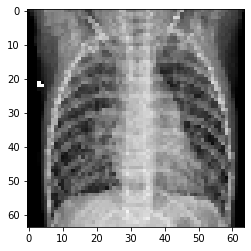

In [30]:
predict_image(r"D:\chest_xray\chest_xray\test\PNEUMONIA\person15_virus_46.jpeg")